In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, RandomizedSearchCV, KFold, GridSearchCV
from sklearn.metrics import SCORERS, confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, SGDClassifier, Perceptron
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
data = pd.read_csv("./../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data["quality"].value_counts(normalize=True)*100

5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64

In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Deep Dive into 'Fixed Acidity'

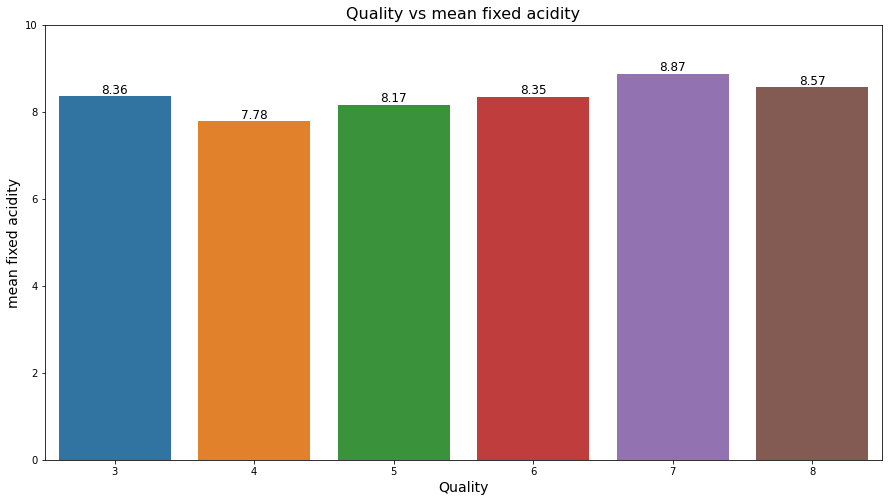

In [7]:
col="fixed acidity"
data_gby_fixed_acidity = data[['quality', col]].groupby(['quality']).mean().reset_index().sort_values(by=col, ascending=False)

plt.subplots(figsize=(15,8))
ax = sns.barplot(x="quality", y=col, data=data_gby_fixed_acidity)

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), 
                   (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', 
                    fontsize=12)

plt.ylim(0,10)
plt.title(f"Quality vs mean {col}", fontsize=16)
plt.ylabel(f"mean {col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

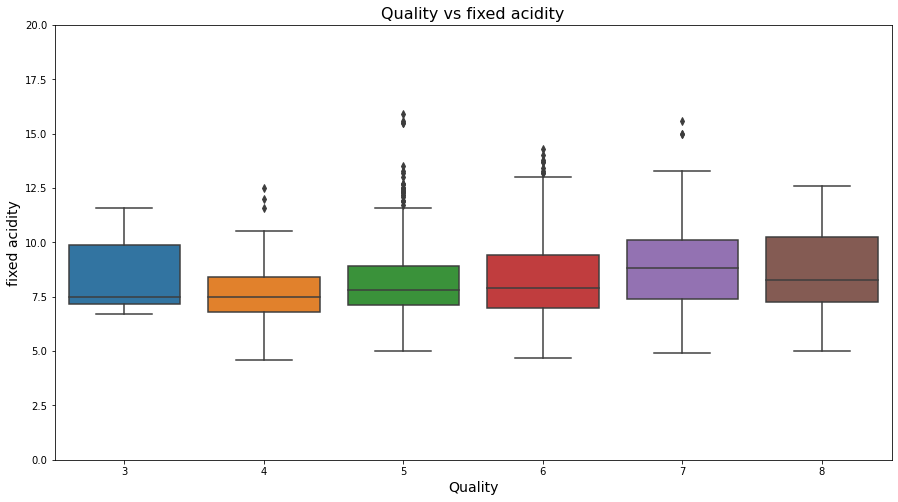

In [8]:
plt.subplots(figsize=(15,8))
col='fixed acidity'
ax = sns.boxplot(x=data["quality"], y=data[col])



plt.ylim(0,20)
plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

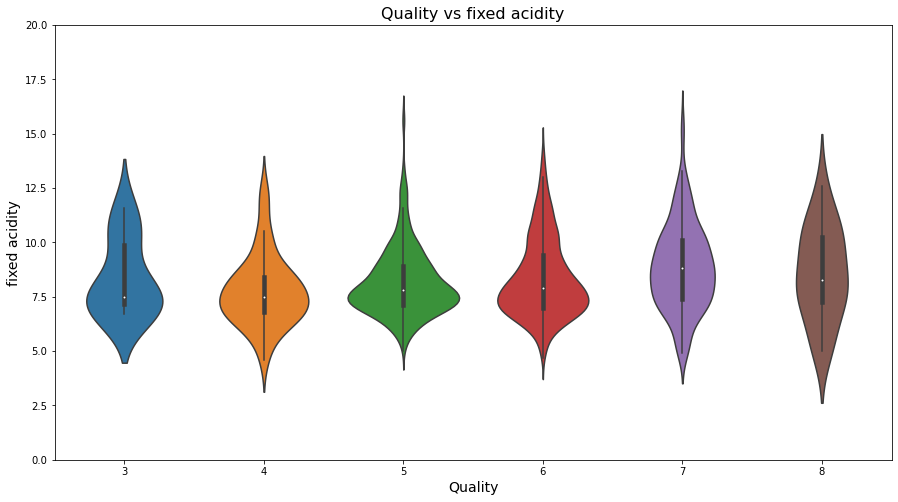

In [9]:
col="fixed acidity"
plt.subplots(figsize=(15,8))
ax = sns.violinplot(x="quality", y=col, data=data)


plt.ylim(0,20)
plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

### Deep dive into volatile acidity

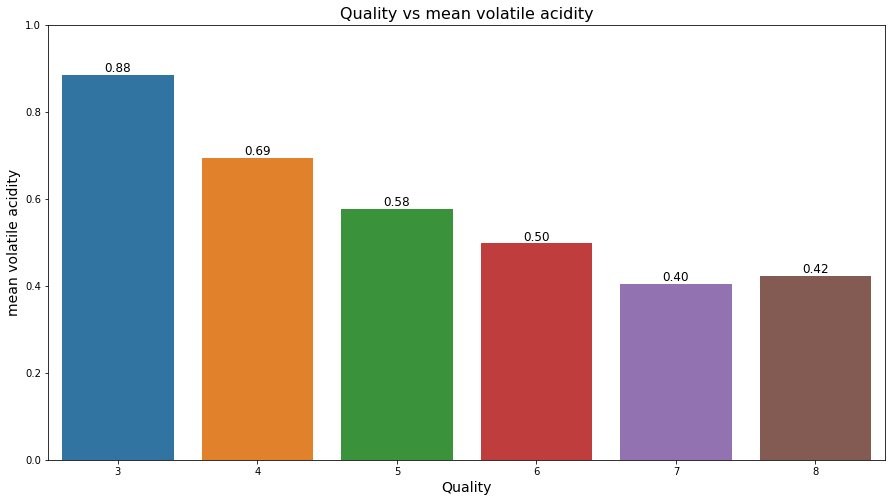

In [10]:
col="volatile acidity"
data_gby_fixed_acidity = data[['quality', col]].groupby(['quality']).mean().reset_index().sort_values(by=col, ascending=False)

plt.subplots(figsize=(15,8))
ax = sns.barplot(x="quality", y=col, data=data_gby_fixed_acidity)

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), 
                   (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', 
                    fontsize=12)

plt.ylim(0,1)
plt.title(f"Quality vs mean {col}", fontsize=16)
plt.ylabel(f"mean {col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

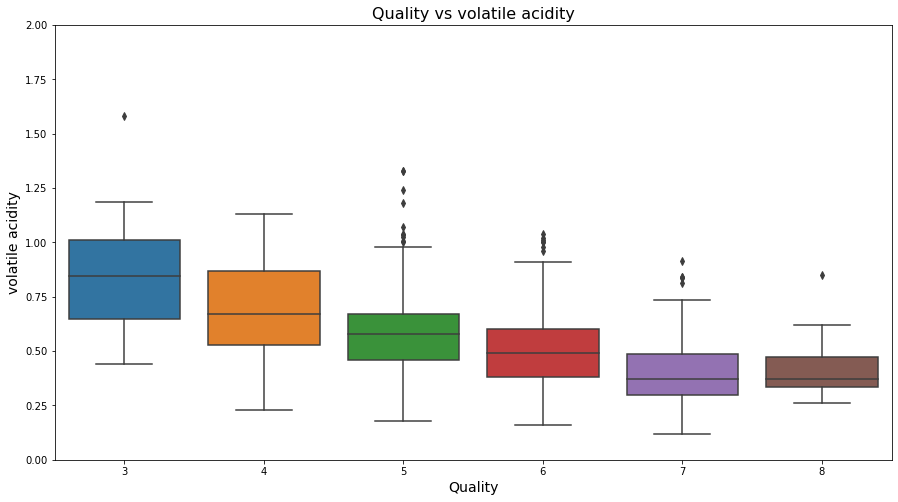

In [11]:
plt.subplots(figsize=(15,8))
col='volatile acidity'
ax = sns.boxplot(x=data["quality"], y=data[col])



plt.ylim(0,2)
plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

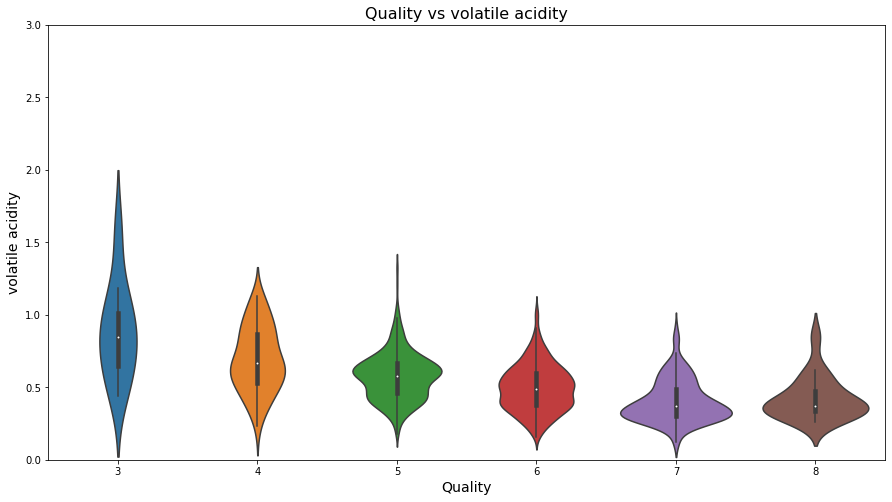

In [12]:
col="volatile acidity"
plt.subplots(figsize=(15,8))
ax = sns.violinplot(x="quality", y=col, data=data)


plt.ylim(0,3)
plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

### Deep dive into citric acid

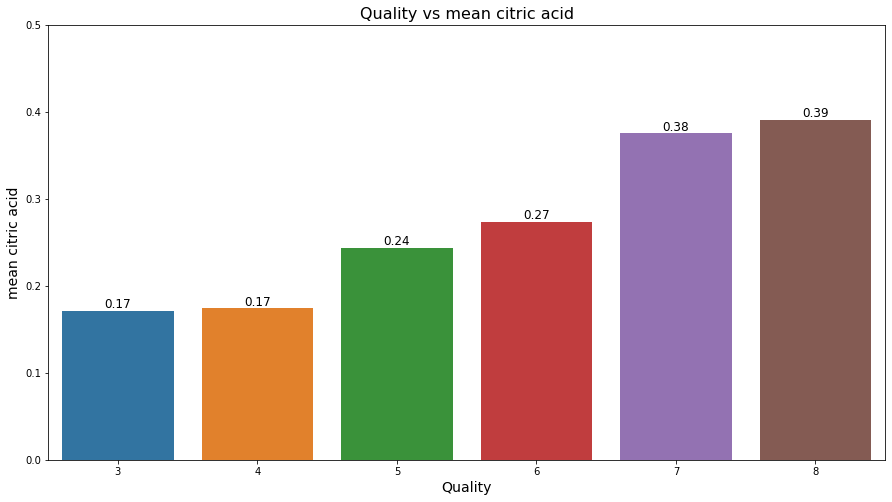

In [13]:
col="citric acid"
data_gby_fixed_acidity = data[['quality', col]].groupby(['quality']).mean().reset_index().sort_values(by=col, ascending=False)

plt.subplots(figsize=(15,8))
ax = sns.barplot(x="quality", y=col, data=data_gby_fixed_acidity)

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), 
                   (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', 
                    fontsize=12)

plt.ylim(0,.5)
plt.title(f"Quality vs mean {col}", fontsize=16)
plt.ylabel(f"mean {col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

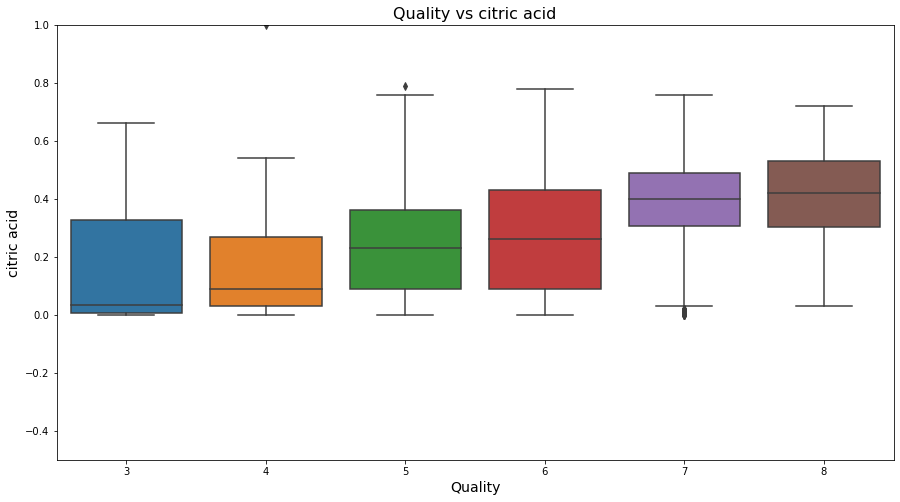

In [14]:
plt.subplots(figsize=(15,8))
col='citric acid'
ax = sns.boxplot(x=data["quality"], y=data[col])



plt.ylim(-.5,1)
plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

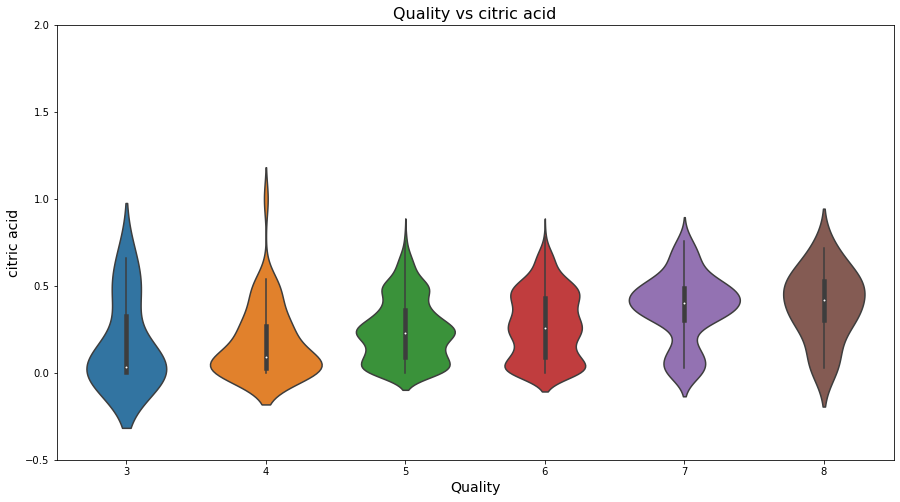

In [15]:
col="citric acid"
plt.subplots(figsize=(15,8))
ax = sns.violinplot(x="quality", y=col, data=data)


plt.ylim(-.5,2)
plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

### Deep dive into Residual Sugar

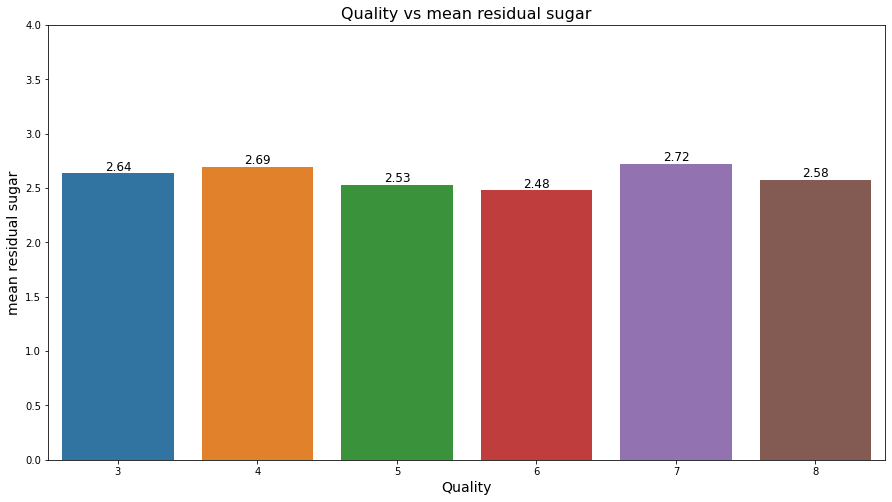

In [16]:
col="residual sugar"
data_gby_fixed_acidity = data[['quality', col]].groupby(['quality']).mean().reset_index().sort_values(by=col, ascending=False)

plt.subplots(figsize=(15,8))
ax = sns.barplot(x="quality", y=col, data=data_gby_fixed_acidity)

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), 
                   (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', 
                    fontsize=12)

plt.ylim(0,4)
plt.title(f"Quality vs mean {col}", fontsize=16)
plt.ylabel(f"mean {col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

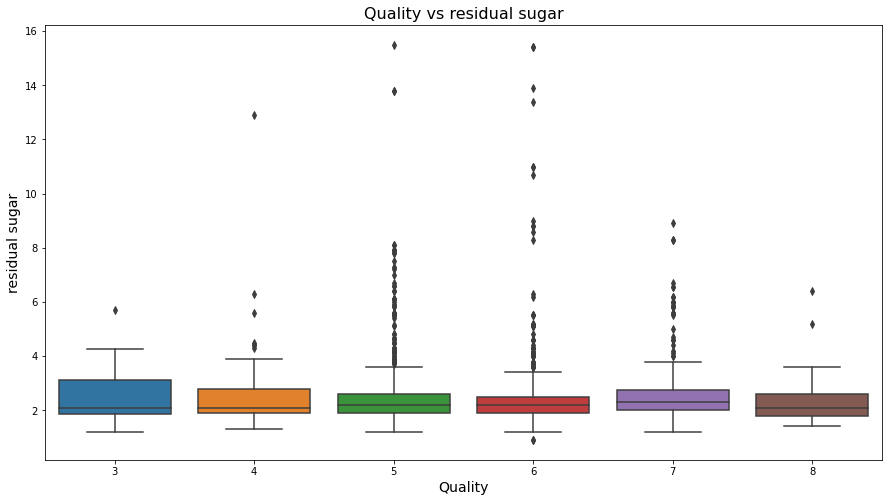

In [17]:
plt.subplots(figsize=(15,8))
col='residual sugar'
ax = sns.boxplot(x=data["quality"], y=data[col])



#plt.ylim(-.5,1)
plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

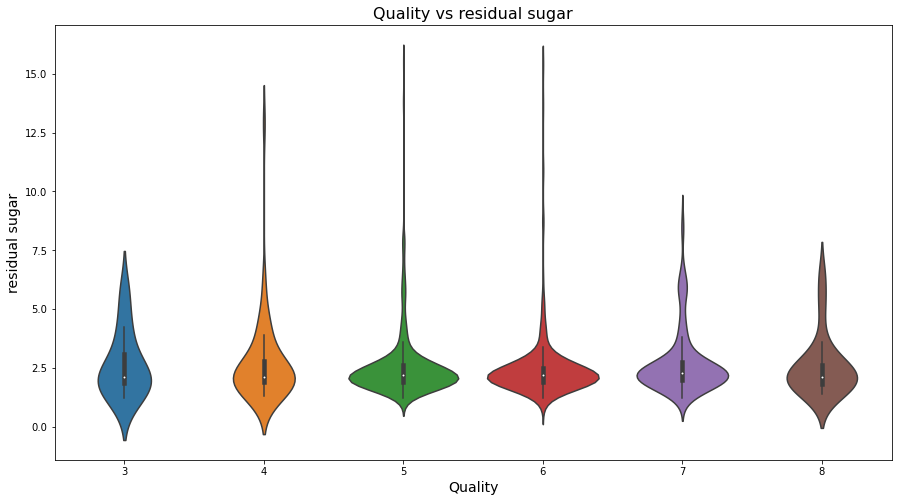

In [18]:
col="residual sugar"
plt.subplots(figsize=(15,8))
ax = sns.violinplot(x="quality", y=col, data=data)


#plt.ylim(-.5,2)
plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

### Deep dive into chlorides

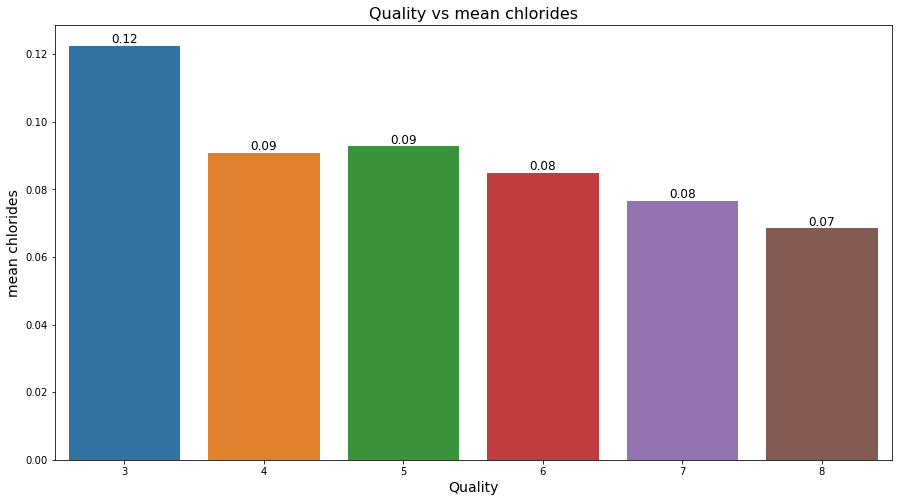

In [19]:
col="chlorides"
data_gby_fixed_acidity = data[['quality', col]].groupby(['quality']).mean().reset_index().sort_values(by=col, ascending=False)

plt.subplots(figsize=(15,8))
ax = sns.barplot(x="quality", y=col, data=data_gby_fixed_acidity)

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), 
                   (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', 
                    fontsize=12)

plt.title(f"Quality vs mean {col}", fontsize=16)
plt.ylabel(f"mean {col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

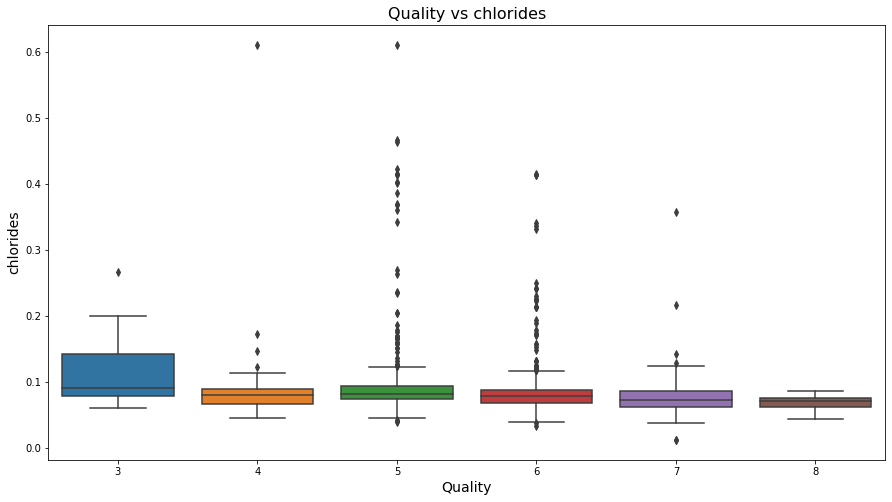

In [20]:
plt.subplots(figsize=(15,8))
col='chlorides'
ax = sns.boxplot(x=data["quality"], y=data[col])


plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

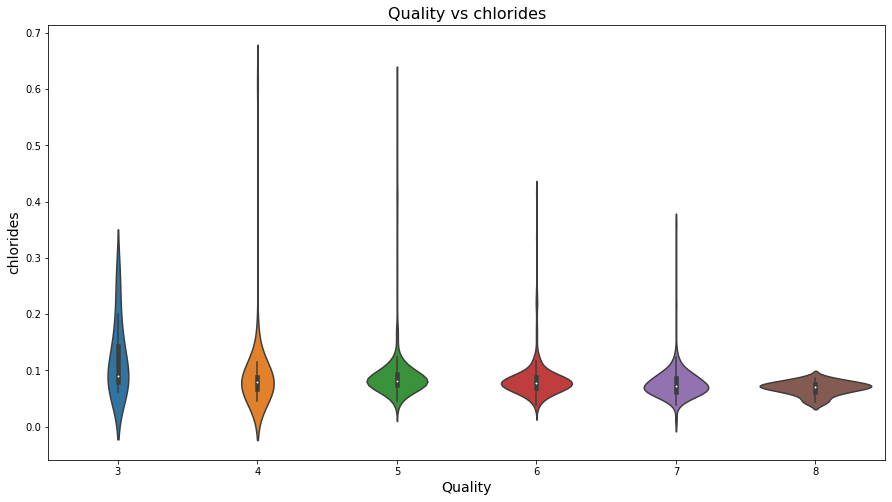

In [21]:
col="chlorides"
plt.subplots(figsize=(15,8))
ax = sns.violinplot(x="quality", y=col, data=data)

plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

### Deep dive into 'free sulfur dioxide'

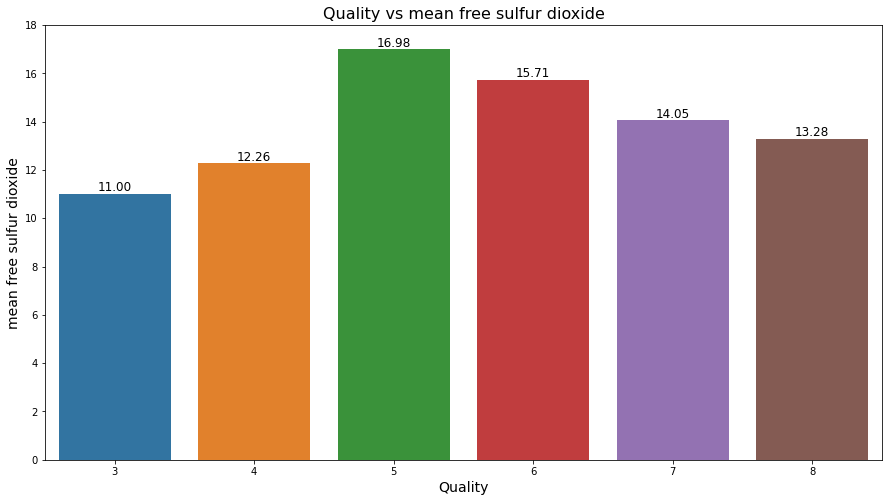

In [22]:
col="free sulfur dioxide"
data_gby_fixed_acidity = data[['quality', col]].groupby(['quality']).mean().reset_index().sort_values(by=col, ascending=False)

plt.subplots(figsize=(15,8))
ax = sns.barplot(x="quality", y=col, data=data_gby_fixed_acidity)

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), 
                   (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', 
                    fontsize=12)

plt.ylim((0,18))    
plt.title(f"Quality vs mean {col}", fontsize=16)
plt.ylabel(f"mean {col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

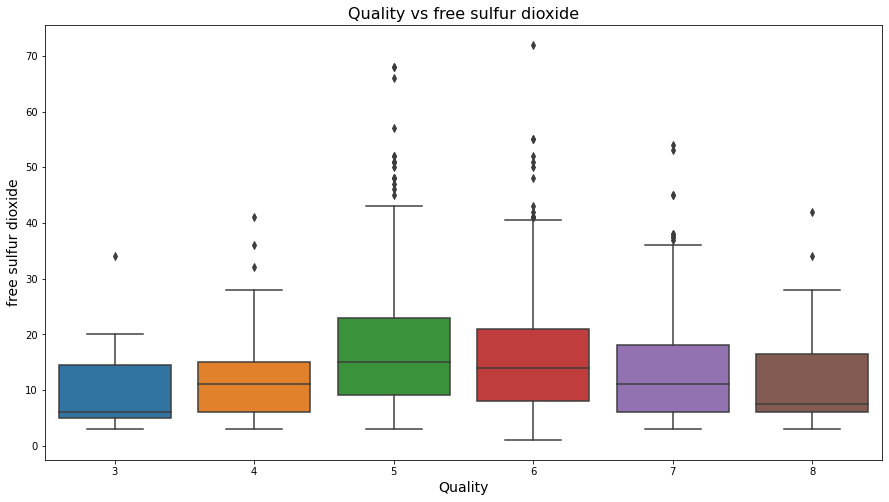

In [23]:
plt.subplots(figsize=(15,8))
ax = sns.boxplot(x=data["quality"], y=data[col])


plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

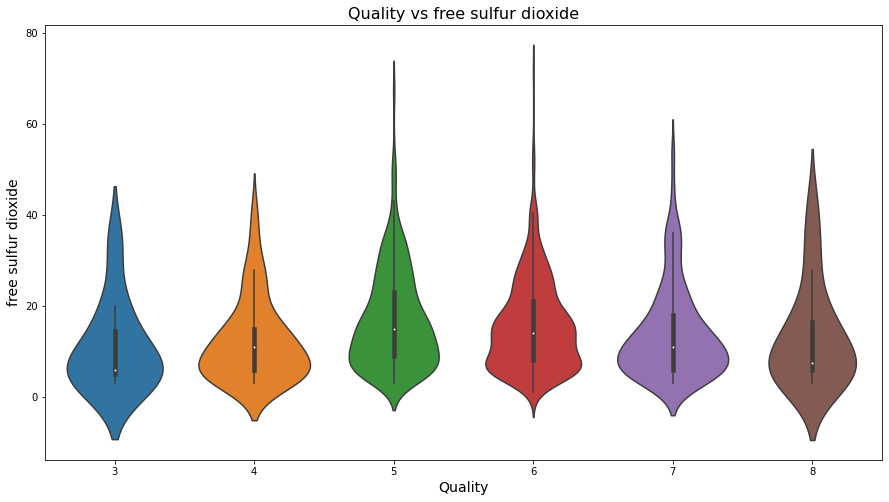

In [24]:
plt.subplots(figsize=(15,8))
ax = sns.violinplot(x="quality", y=col, data=data)

plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

### Deep dive into total sulfur dioxide

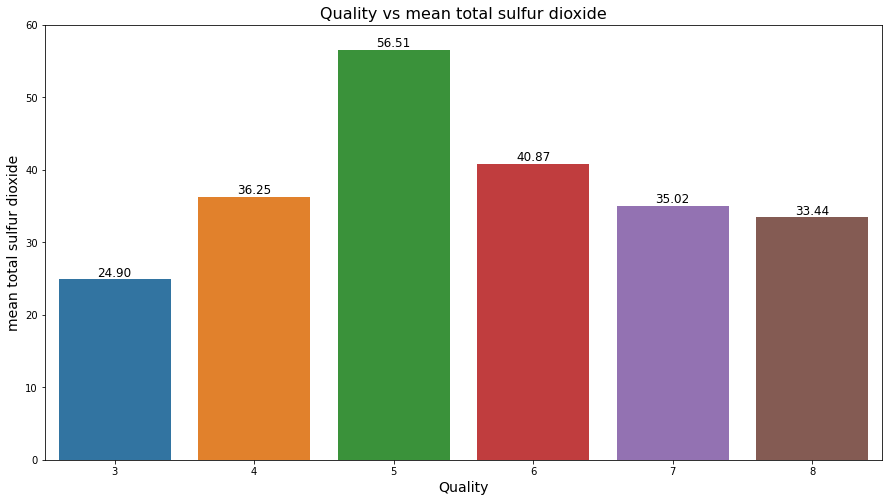

In [25]:
col="total sulfur dioxide"
data_gby_fixed_acidity = data[['quality', col]].groupby(['quality']).mean().reset_index().sort_values(by=col, ascending=False)

plt.subplots(figsize=(15,8))
ax = sns.barplot(x="quality", y=col, data=data_gby_fixed_acidity)

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), 
                   (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', 
                    fontsize=12)

plt.ylim((0,60))    
plt.title(f"Quality vs mean {col}", fontsize=16)
plt.ylabel(f"mean {col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

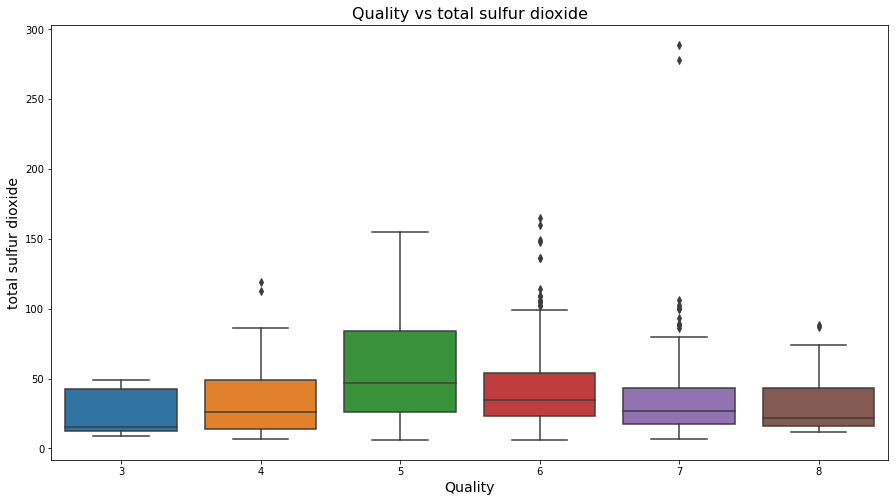

In [26]:
plt.subplots(figsize=(15,8))
ax = sns.boxplot(x=data["quality"], y=data[col])


plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

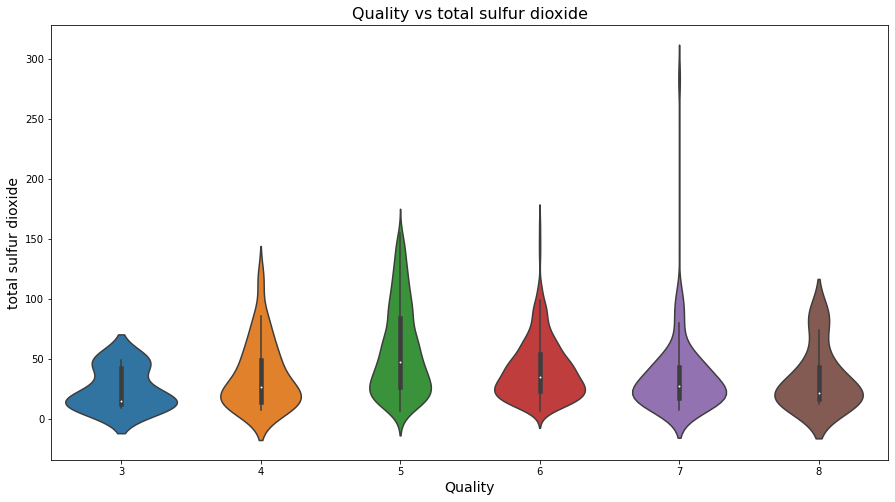

In [27]:
plt.subplots(figsize=(15,8))
ax = sns.violinplot(x="quality", y=col, data=data)

plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

### Deep dive into density

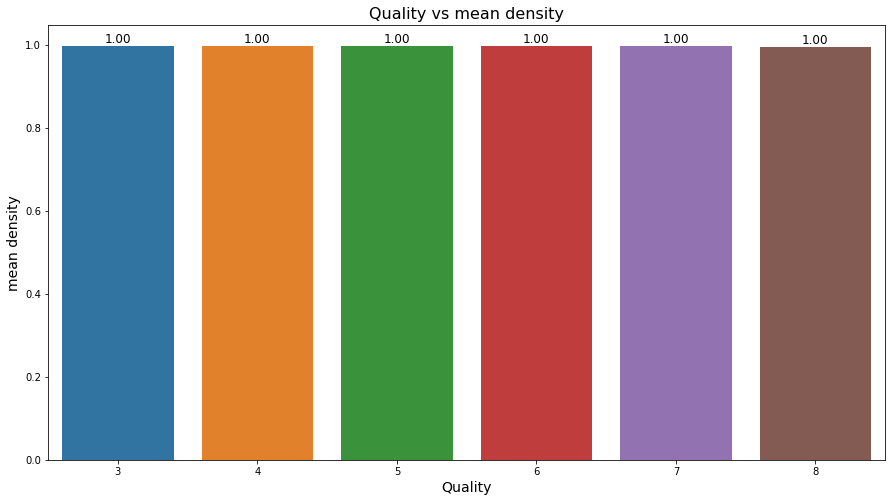

In [28]:
col="density"
data_gby_fixed_acidity = data[['quality', col]].groupby(['quality']).mean().reset_index().sort_values(by=col, ascending=False)

plt.subplots(figsize=(15,8))
ax = sns.barplot(x="quality", y=col, data=data_gby_fixed_acidity)

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), 
                   (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', 
                    fontsize=12)

#plt.ylim((0,60))    
plt.title(f"Quality vs mean {col}", fontsize=16)
plt.ylabel(f"mean {col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

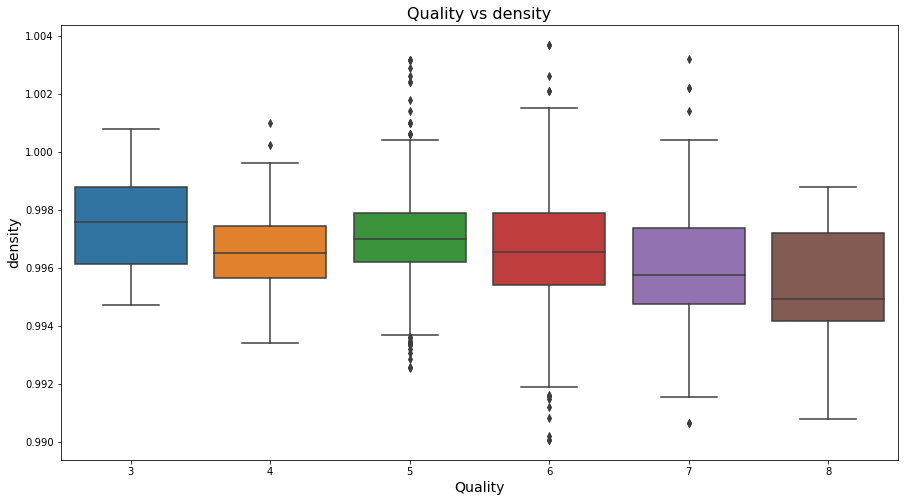

In [29]:
plt.subplots(figsize=(15,8))
ax = sns.boxplot(x=data["quality"], y=data[col])


plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

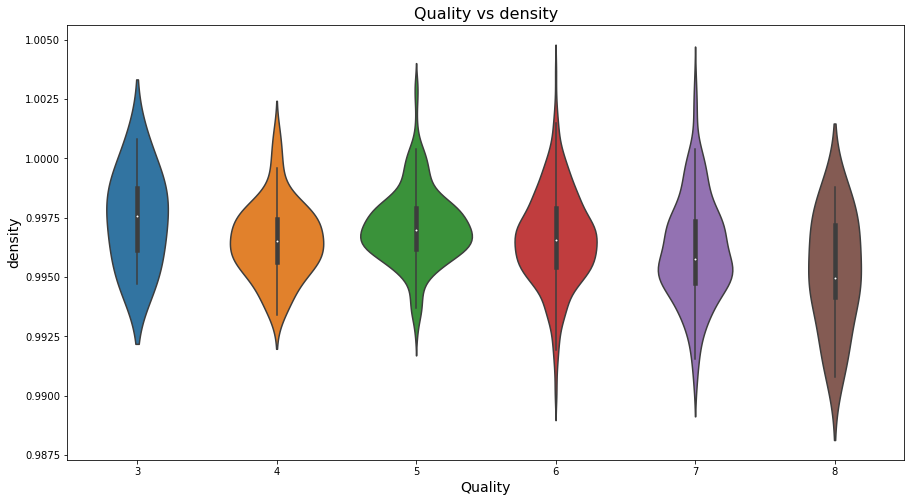

In [30]:
plt.subplots(figsize=(15,8))
ax = sns.violinplot(x="quality", y=col, data=data)

plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

### Deep dive into pH

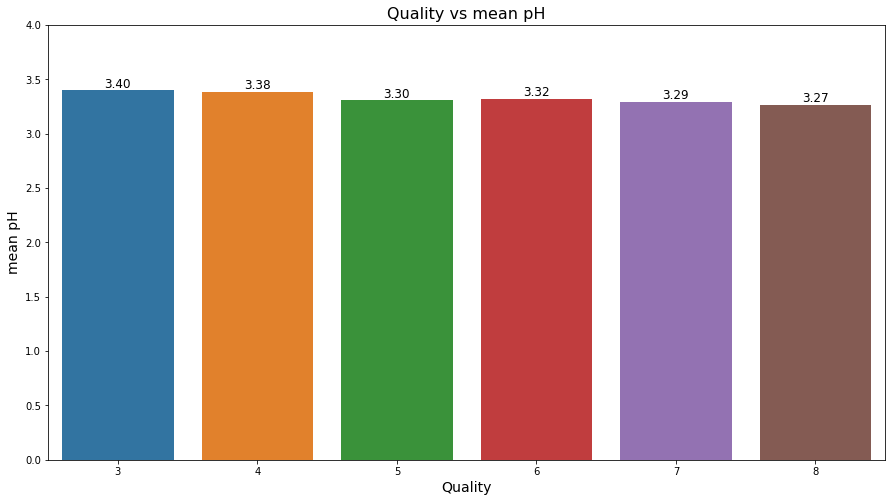

In [31]:
col="pH"
data_gby_fixed_acidity = data[['quality', col]].groupby(['quality']).mean().reset_index().sort_values(by=col, ascending=False)

plt.subplots(figsize=(15,8))
ax = sns.barplot(x="quality", y=col, data=data_gby_fixed_acidity)

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), 
                   (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', 
                    fontsize=12)

plt.ylim((0,4))    
plt.title(f"Quality vs mean {col}", fontsize=16)
plt.ylabel(f"mean {col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

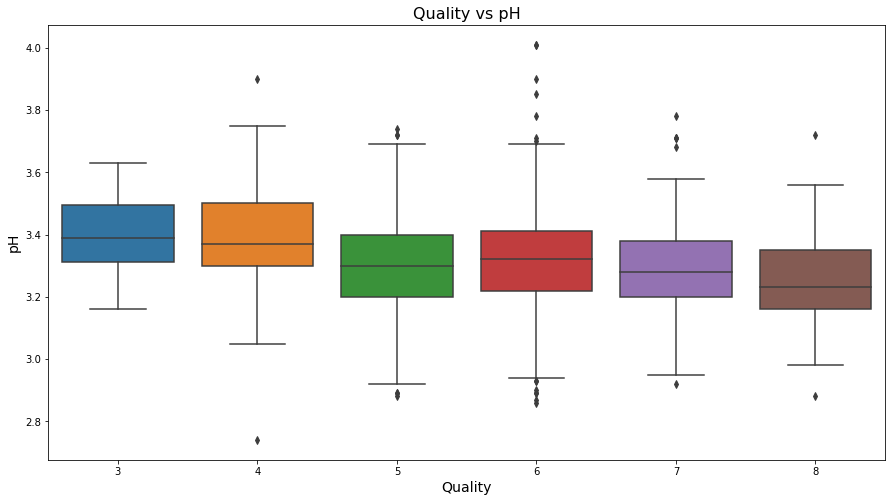

In [32]:
plt.subplots(figsize=(15,8))
ax = sns.boxplot(x=data["quality"], y=data[col])


plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

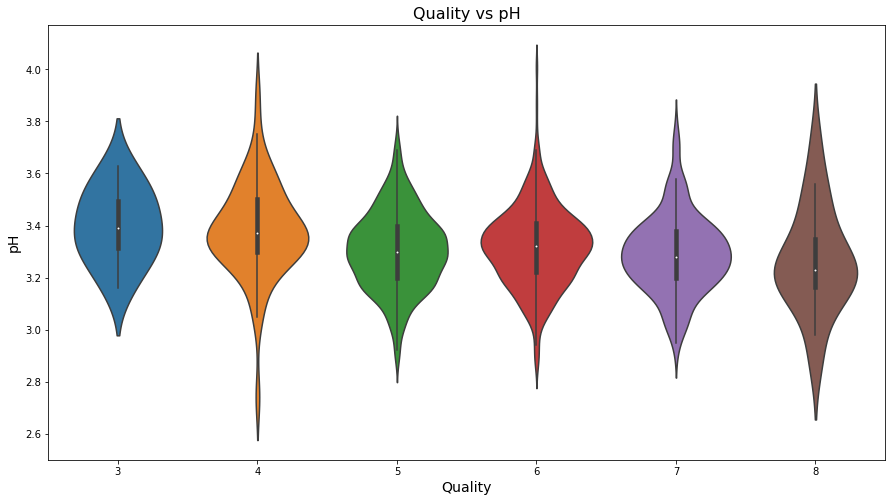

In [33]:
plt.subplots(figsize=(15,8))
ax = sns.violinplot(x="quality", y=col, data=data)

plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

### Deep dive into sulphates

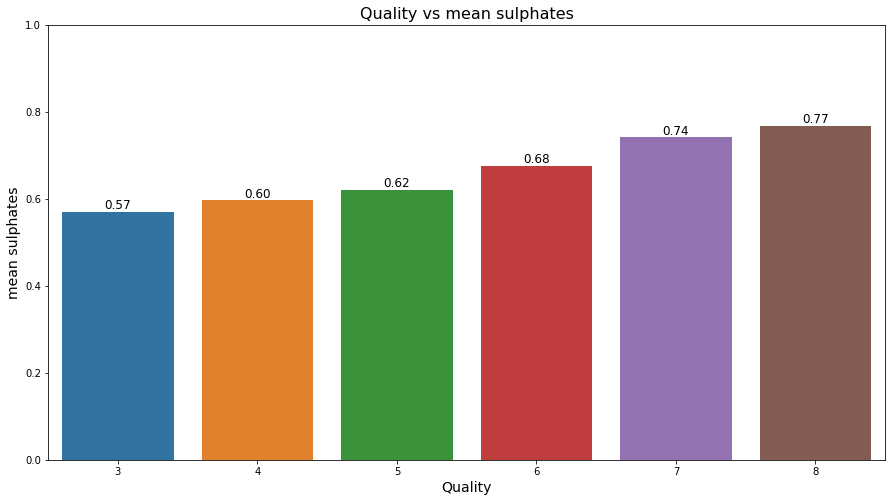

In [34]:
col="sulphates"
data_gby_fixed_acidity = data[['quality', col]].groupby(['quality']).mean().reset_index().sort_values(by=col, ascending=False)

plt.subplots(figsize=(15,8))
ax = sns.barplot(x="quality", y=col, data=data_gby_fixed_acidity)

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), 
                   (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', 
                    fontsize=12)

plt.ylim((0,1))    
plt.title(f"Quality vs mean {col}", fontsize=16)
plt.ylabel(f"mean {col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

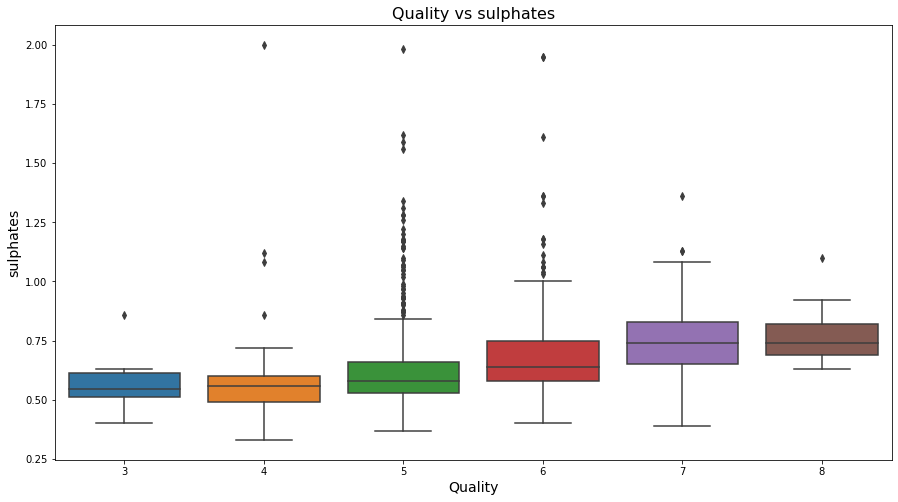

In [35]:
plt.subplots(figsize=(15,8))
ax = sns.boxplot(x=data["quality"], y=data[col])


plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

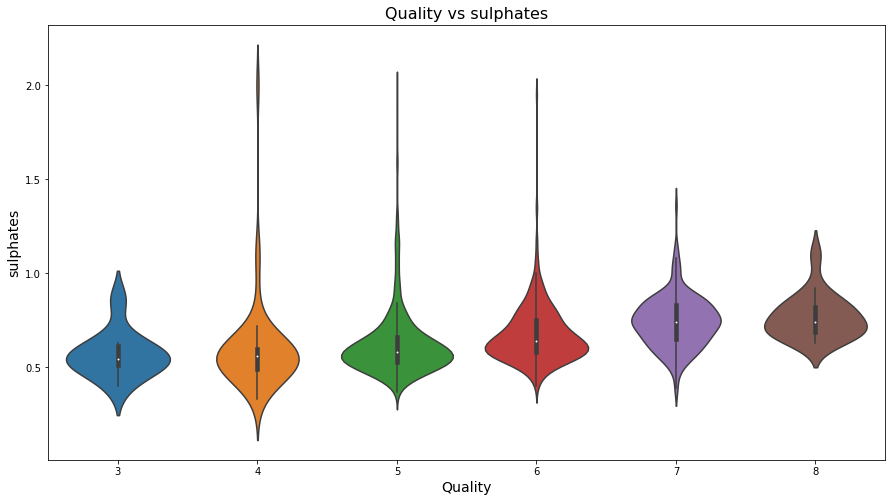

In [36]:
plt.subplots(figsize=(15,8))
ax = sns.violinplot(x="quality", y=col, data=data)

plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

### Deep dive into alcohol

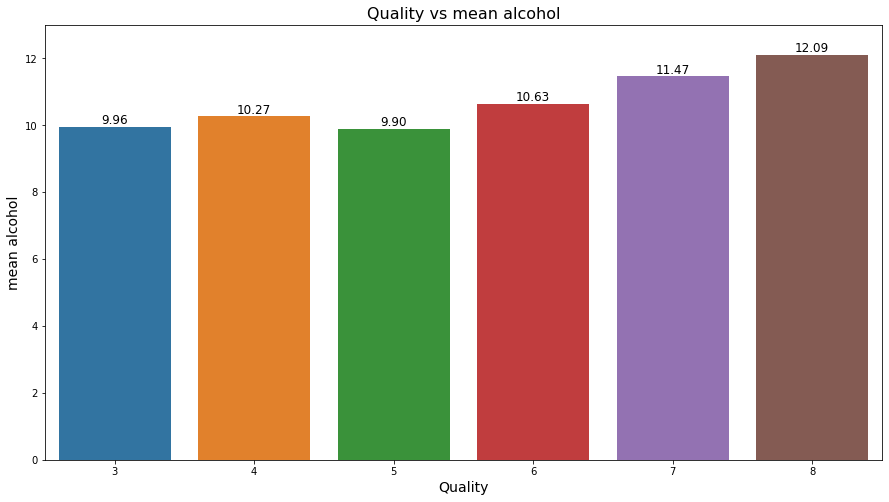

In [37]:
col="alcohol"
data_gby_fixed_acidity = data[['quality', col]].groupby(['quality']).mean().reset_index().sort_values(by=col, ascending=False)

plt.subplots(figsize=(15,8))
ax = sns.barplot(x="quality", y=col, data=data_gby_fixed_acidity)

for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), 
                   (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', 
                    fontsize=12)

plt.ylim((0,13))    
plt.title(f"Quality vs mean {col}", fontsize=16)
plt.ylabel(f"mean {col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

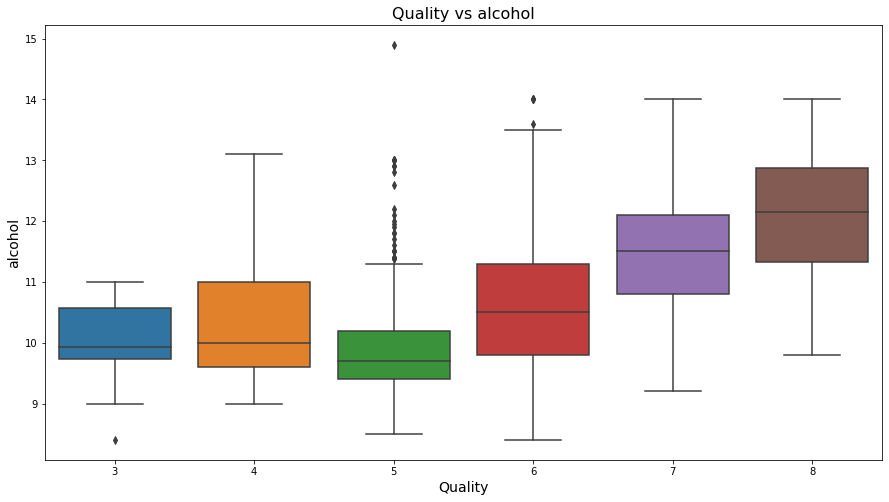

In [38]:
plt.subplots(figsize=(15,8))
ax = sns.boxplot(x=data["quality"], y=data[col])


plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

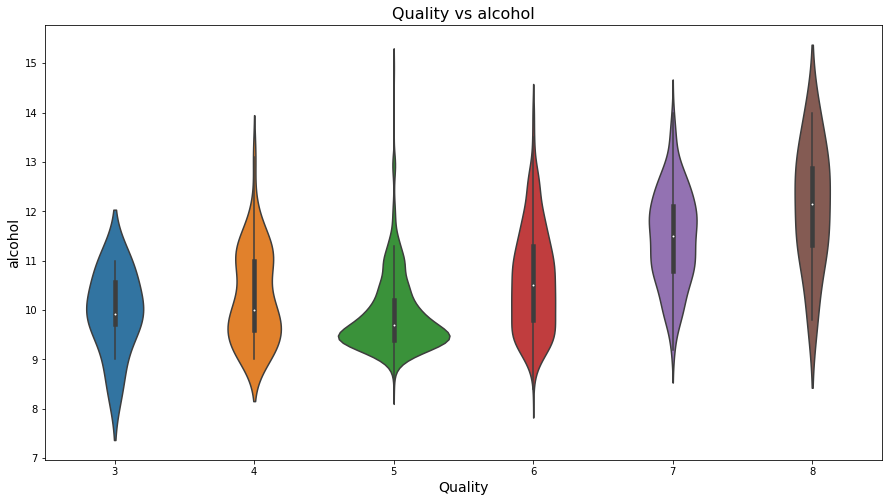

In [39]:
plt.subplots(figsize=(15,8))
ax = sns.violinplot(x="quality", y=col, data=data)

plt.title(f"Quality vs {col}", fontsize=16)
plt.ylabel(f"{col}", fontsize=14)
plt.xlabel("Quality", fontsize=14)
plt.show()

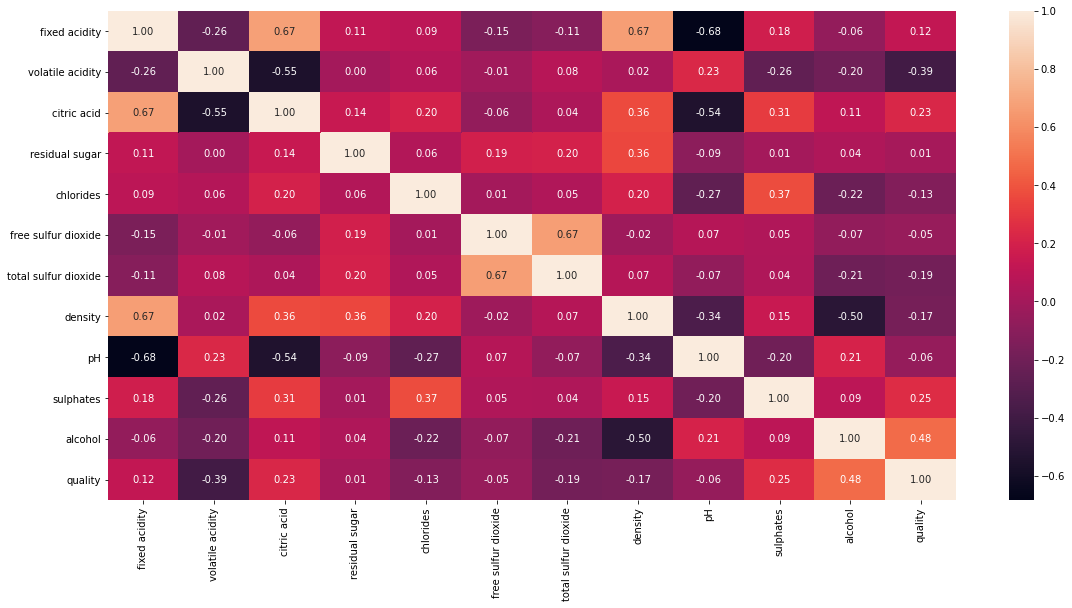

In [40]:
plt.subplots(figsize=(19,9))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

In [41]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [42]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [43]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()
#Bad becomes 0 and good becomes 1 
data['quality'] = label_quality.fit_transform(data['quality'])
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [44]:
X = data.drop(columns=['quality'])
y = data['quality']

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,stratify=y,shuffle=True)

In [46]:
def model_name(key):
    model_dict = {
        'lrc': "LogisticRegression", 
        'pac': "PassiveAggressiveClassifier",
        'rdc': "RidgeClassifier",
        'sgc': "SGDClassifier",
        'pcn': "Perceptron",
        'gpc': "GaussianProcessClassifier",
        'lda': "LinearDiscriminantAnalysis",
        'qda': "QuadraticDiscriminantAnalysis",
        'knn': "KNeighborsClassifier",
        'dtc': "DecisionTreeClassifier", 
        'etc': "ExtraTreesClassifier", 
        'knn': "KNeighborsClassifier",
        'gnb': "GaussianNB",
        'bnb': "BernoulliNB",
        'rfc': "RandomForestClassifier",
        'svc': "SVC",
        'lvc': "LinearSVC",
        'nvc': "NuSVC",
        'bgc': "BaggingClassifier",
        'abc': "AdaBoostClassifier",
        'gbc': "GradientBoostingClassifier",
        'lgb': "LGBMClassifier",
        'cgb': "CatBoostClassifier",
        'xgb': "XGBClassifier"
    }
    return model_dict[key]



def init(X, y, scoring='accuracy'):    
    result = pd.DataFrame(columns=['model', f'mean-{scoring}', f'std-{scoring}'])
    
    skf = StratifiedKFold(n_splits=10)
    model_dict = {
        'lrc': LogisticRegression(), 
        'pac': PassiveAggressiveClassifier(),
        'rdc': RidgeClassifier(),
        'sgc': SGDClassifier(),
        'pcn': Perceptron(),
        'gpc': GaussianProcessClassifier(),
        'lda': LinearDiscriminantAnalysis(),
        'qda': QuadraticDiscriminantAnalysis(),
        'knn': KNeighborsClassifier(),
        'dtc': DecisionTreeClassifier(), 
        'etc': ExtraTreesClassifier(), 
        'knn': KNeighborsClassifier(),
        'gnb': GaussianNB(),
        'bnb': BernoulliNB(),
        'rfc': RandomForestClassifier(),
        'svc': SVC(),
        'lvc': LinearSVC(),
        'nvc': NuSVC(),
        'bgc': BaggingClassifier(),
        'abc': AdaBoostClassifier(),
        'gbc': GradientBoostingClassifier(),
        'lgb': LGBMClassifier(),
        'cgb': CatBoostClassifier(verbose=0),
        'xgb': XGBClassifier()
    }

    for key in tqdm(model_dict.keys()):
        res = cross_val_score(model_dict[key], X, y=y, scoring=scoring, cv=skf, n_jobs=-1, verbose=0)
        res_p = pd.DataFrame(data={
            'model': [key],
            f'mean-{scoring}': [res.mean()],
            f'std-{scoring}': [res.std()]
        })
        result = pd.concat([result, res_p], axis=0)
    result = result.sort_values(by=[f'mean-{scoring}'], ascending=False)
    
    fig,ax =  plt.subplots(figsize=(20, 8), sharey=True)
    plt.title(f"Model vs mean {scoring}")
    auc_chart = sns.barplot(ax = ax, x='model', y=f'mean-{scoring}', data=result)
    for p in auc_chart.patches:
        auc_chart.annotate('{:.4f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=9)
    
    ax.set_ylim((0,1))
    plt.ylabel(f"Mean of {scoring}")
    plt.xlabel("Model")
    plt.show()
    
    fig,ax =  plt.subplots(figsize=(20, 8), sharey=True)
    plt.title(f"Model vs {scoring} standard deviation")
    std_chart = sns.barplot(ax = ax, x='model', y=f'std-{scoring}', data=result)
    for p in std_chart.patches:
        std_chart.annotate('{:.4f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=9)
    
    ylim_val = max(result[f'std-{scoring}']) + max(result[f'std-{scoring}'])*.1
    ax.set_ylim((0,ylim_val))
    plt.ylabel(f"Standard deviation of  {scoring}")
    plt.xlabel("Model")
    plt.show()
    
    return result

100%|██████████| 23/23 [00:41<00:00,  1.80s/it]


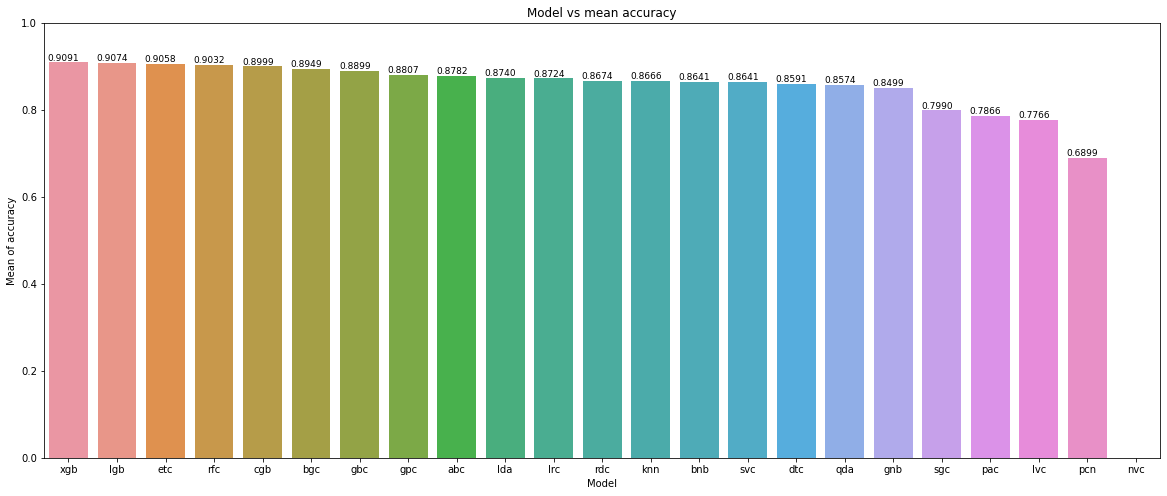

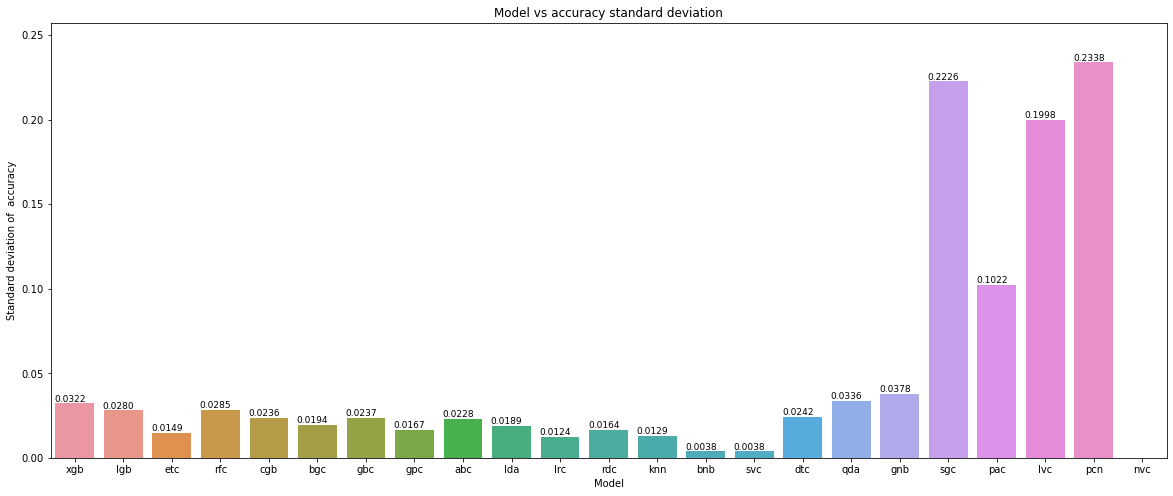

In [47]:
res = init(X_train, y_train, scoring='accuracy')

In [48]:
res

,model,mean-accuracy,std-accuracy
0,xgb,0.909076,0.032207
0,lgb,0.907423,0.027999
0,etc,0.905756,0.014919
0,rfc,0.903235,0.028502
0,cgb,0.899916,0.023572
0,bgc,0.894923,0.019385
0,gbc,0.889923,0.023746
0,gpc,0.880728,0.016727
0,abc,0.878214,0.022838
0,lda,0.874048,0.018904


In [49]:
model_name('lgb')

'LGBMClassifier'

In [50]:
%%time
clf = LGBMClassifier(verbose=0)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train), clf.score(X_valid, y_valid))
print("================================")

print("accuracy_score")
print(accuracy_score(y_train, clf.predict(X_train)))

print("================================")
print("classification_report train")
print(print(classification_report(y_train, clf.predict(X_train))))

print("================================")
print("classification_report test")
print(print(classification_report(y_valid, clf.predict(X_valid))))

1.0 0.91
accuracy_score
1.0
classification_report train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1036
           1       1.00      1.00      1.00       163

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199

None
classification_report test
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       346
           1       0.72      0.54      0.62        54

    accuracy                           0.91       400
   macro avg       0.83      0.75      0.78       400
weighted avg       0.90      0.91      0.90       400

None
CPU times: user 749 ms, sys: 18.2 ms, total: 767 ms
Wall time: 227 ms
